## Evaluating Regression Models Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

In [58]:
import pandas as pd
import numpy as np
import math

from pydataset import data

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

#### assuming X and y are already defined
model = LinearRegression().fit(X, y)

predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression().fit(df[['total_bill']], df.tip)

In [5]:
df['yhat'] = model.predict(df[['total_bill']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


In [6]:
df['yhat_baseline'] = df['tip'].mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


3. Plot the residuals for the linear regression model that you made.

In [7]:
df['residual'] = df['tip'] - df['yhat']
df['residual_baseline'] = df['tip'] - df['yhat_baseline']

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


In [8]:
import matplotlib.pyplot as plt

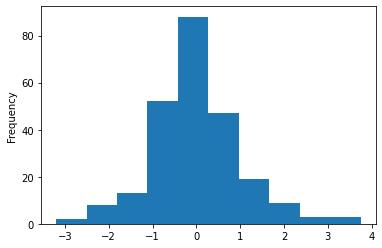

In [9]:
df.residual.plot.hist()
plt.show()

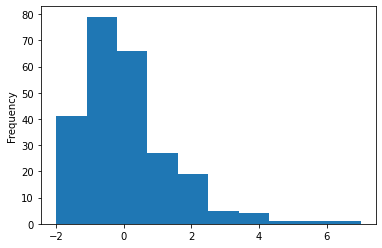

In [10]:
df.residual_baseline.plot.hist()
plt.show()

In [11]:
import seaborn as sns

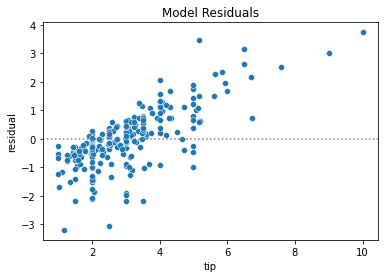

In [12]:
sns.scatterplot(data=df, x='tip', y='residual')
plt.title(label='Model Residuals')
plt.axhline(y=0, ls=':', color='grey')
plt.show()

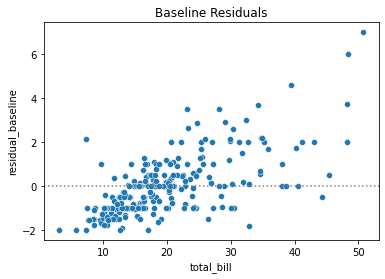

In [45]:
sns.scatterplot(data=df, x='total_bill', y='residual_baseline')
plt.title(label='Baseline Residuals')
plt.axhline(y=0, ls=':', color='grey')
plt.show()

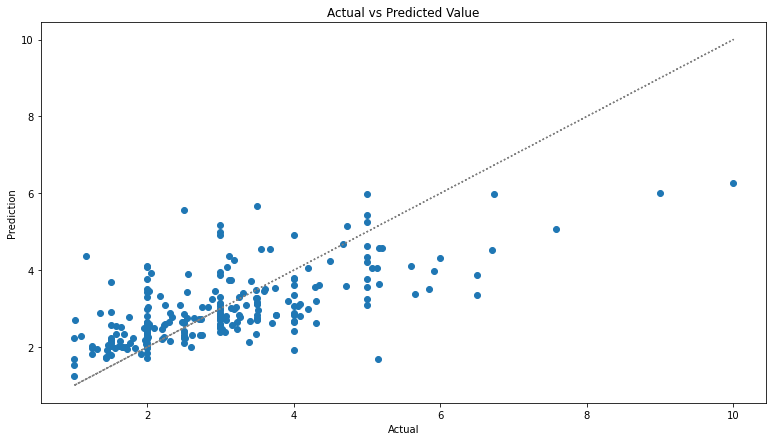

In [13]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.scatter(df.tip, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(df.tip, df.tip, ls=':', c='gray')

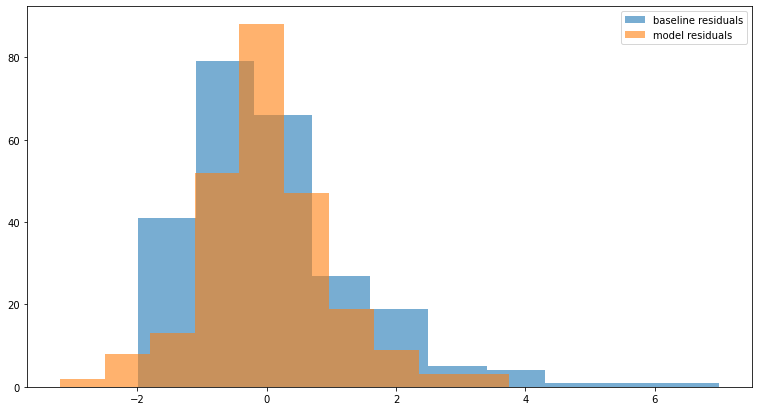

In [46]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.residual_baseline, label='baseline residuals', alpha=.6)
ax.hist(df.residual, label='model residuals', alpha=.6)
ax.legend()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [15]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

In [16]:
sse = mean_squared_error(df.tip, df.yhat) * len(df)

print("SSE: ", sse) 

SSE:  252.788743850776


In [17]:
mse = mean_squared_error(df.tip, df.yhat)

print("MSE: ", mse) 

MSE:  1.036019442011377


In [18]:
rmse = sqrt(mean_squared_error(df.tip, df.yhat))

print("RMSE: ", rmse)

RMSE:  1.0178504025697377


In [19]:
ess = ((df.yhat - df.tip.mean())**2).sum()

print("ESS: ", ess) 

ESS:  212.42373319840422


In [20]:
tss = ((df.tip - df.tip.mean())**2).sum()

print("TSS: ", tss) 

TSS:  465.2124770491804


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [21]:
sse_baseline = mean_squared_error(df.tip, df.yhat_baseline) * len(df)

print("Baseline SSE: ", sse_baseline)

Baseline SSE:  465.2124770491804


In [22]:
mse_baseline = mean_squared_error(df.tip, df.yhat_baseline)

print("Baseline MSE: ", mse_baseline)

Baseline MSE:  1.906608512496641


In [23]:
rmse_baseline = sqrt(mean_squared_error(df.tip, df.yhat_baseline))

print("Baseline RMSE: ", rmse_baseline)

Baseline RMSE:  1.3807999538298954


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
print("SSE: ", sse)
print("SSE - baseline: ", sse_baseline)

if sse < sse_baseline:
    print(f'\nBased on SSE, the model({sse}) performs better than the baseline({sse_baseline}).')
else:
    print(f'\nBased on SSE, the baseline({sse_baseline}) performs better than the model ({sse}).')

SSE:  252.788743850776
SSE - baseline:  465.2124770491804

Based on SSE, the model(252.788743850776) performs better than the baseline(465.2124770491804).


7. What is the amount of variance explained in your model?

In [25]:
evs = explained_variance_score(df.tip, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


8. Is your model better than the baseline model?

In [26]:
df_eval = pd.DataFrame(np.array(['sse','mse','rmse']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['sse_baseline','mse_baseline','rmse_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([sse, mse, rmse])
df_baseline_eval['model_error'] = np.array([sse_baseline, mse_baseline, rmse_baseline])

print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    sse   252.788744
1    mse     1.036019
2   rmse     1.017850
          metric  model_error
0   sse_baseline   465.212477
1   mse_baseline     1.906609
2  rmse_baseline     1.380800


In [27]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,sse,252.788744,-212.423733
1,mse,1.036019,-0.870589
2,rmse,1.017850,-0.362950


In [44]:
print("RMSE: ", rmse)
print("Baseline RMSE: ", rmse_baseline)

if rmse < rmse_baseline:
    print(f'\nBased on RMSE, the model({rmse:.2f}) performs better than the baseline({rmse_baseline:.2f}).')
else:
    print(f'\nBased on RMSE, the baseline({rmse_baseline:.2f}) performs better than the model ({rmse:.2f}).')

RMSE:  1.0178504025697377
Baseline RMSE:  1.3807999538298954

Based on RMSE, the model(1.02) performs better than the baseline(1.38).


9. Create a file named evaluate.py that contains the following functions.

-plot_residuals(y, yhat): creates a residual plot

-regression_errors(y, yhat): returns the following values:
 
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)

-baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

-better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [29]:
def plot_residuals(df, x, y):


    residual = df['yhat'] - y
    residual_baseline = df['yhat_baseline'] - y
    
    fig, ax = plt.subplots(2, figsize=(10, 8))
    
    ax[0].scatter(x, residual)
    ax[0].set_title(label='Model Residuals')
    ax[0].axhline(y=0, ls=':', color='grey')
    
    ax[1].scatter(x, residual_baseline)
    ax[1].set_title(label='Baseline Residuals')
    ax[1].axhline(y=0, ls=':', color='grey')

    plt.show()

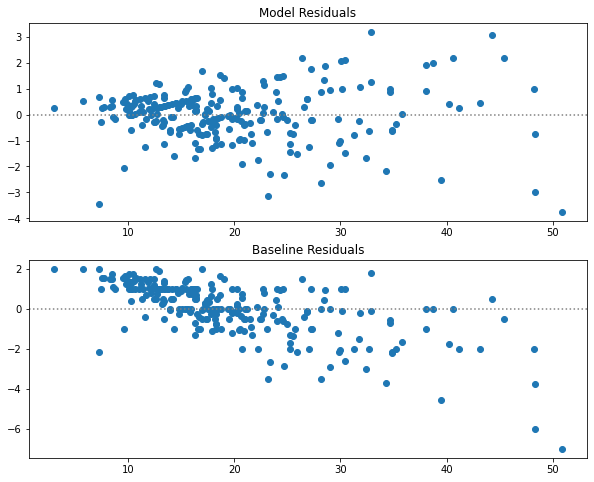

In [30]:
plot_residuals(df, df.total_bill, df.tip)

In [31]:
def regression_errors(df, y):
    
    sse = mean_squared_error(y, df.yhat) * len(df)
    print("Model SSE: ", sse)
    
    ess = ((df.yhat - y.mean())**2).sum()
    print("Model ESS: ", ess)
    
    tss = ((df.tip - y.mean())**2).sum()
    print("Model TSS: ", tss)

    mse = mean_squared_error(y, df.yhat)
    print("Model MSE: ", mse)

    rmse = sqrt(mean_squared_error(y, df.yhat))
    print("Model RMSE: ", rmse)

In [32]:
regression_errors(df, df.tip)

Model SSE:  252.788743850776
Model ESS:  212.42373319840422
Model TSS:  465.2124770491804
Model MSE:  1.036019442011377
Model RMSE:  1.0178504025697377


In [33]:
def baseline_mean_errors(df, y):

    sse_baseline = mean_squared_error(y, df.yhat_baseline) * len(df)
    print("Baseline SSE: ", sse_baseline)

    mse_baseline = mean_squared_error(y, df.yhat_baseline)
    print("Baseline MSE: ", mse_baseline)

    rmse_baseline = sqrt(mean_squared_error(y, df.yhat_baseline))
    print("Baseline RMSE: ", rmse_baseline)

In [34]:
baseline_mean_errors(df, df.tip)

Baseline SSE:  465.2124770491804
Baseline MSE:  1.906608512496641
Baseline RMSE:  1.3807999538298954


In [35]:
def better_than_baseline(df, y):
    print("RMSE: ", rmse)
    print("Baseline RMSE: ", rmse_baseline)

    if rmse < rmse_baseline:
        print(f'\nBased on RMSE, the model({rmse}) performs better than the baseline({rmse_baseline}).')
    else:
        print(f'\nBased on RMSE, the baseline({rmse_baseline}) performs better than the model ({rmse}).')

In [36]:
better_than_baseline(df, df.tip)

RMSE:  1.0178504025697377
Baseline RMSE:  1.3807999538298954

Based on RMSE, the model(1.0178504025697377) performs better than the baseline(1.3807999538298954).


In [37]:
import evaluate

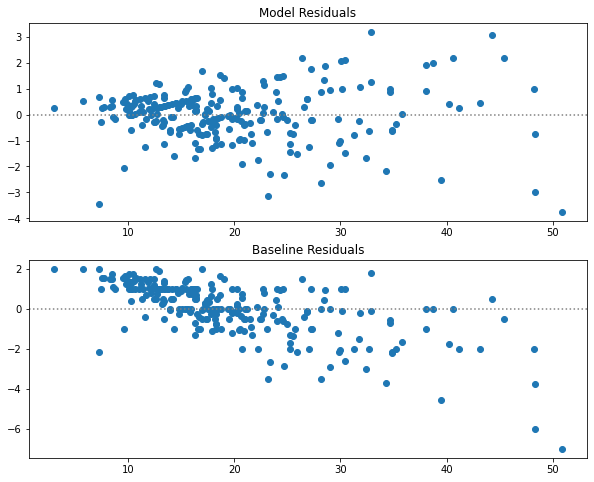

In [38]:
evaluate.plot_residuals(df, df.total_bill, df.tip)

In [39]:
evaluate.regression_errors(df, df.tip)

Model SSE:  252.788743850776
Model ESS:  212.42373319840422
Model TSS:  465.2124770491804
Model MSE:  1.036019442011377
Model RMSE:  1.0178504025697377


In [40]:
evaluate.baseline_mean_errors(df, df.tip)

Baseline SSE:  465.2124770491804
Baseline MSE:  1.906608512496641
Baseline RMSE:  1.3807999538298954


In [41]:
evaluate.better_than_baseline(df, df.tip)

RMSE:  1.0178504025697377
Baseline RMSE:  1.3807999538298954

Based on RMSE, the model(1.0178504025697377) performs better than the baseline(1.3807999538298954).


10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [51]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [52]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [53]:
actual = mpg.hwy
predicted = model.predict(mpg[['displ']])

In [54]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) ** 2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [55]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
        'r2': r2_score(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    sse_baseline = sse(actual, actual.mean())
    sse_model = sse(actual, predicted)
    return sse_model < sse_baseline

In [59]:
regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [60]:
better_than_baseline(actual, predicted)

True

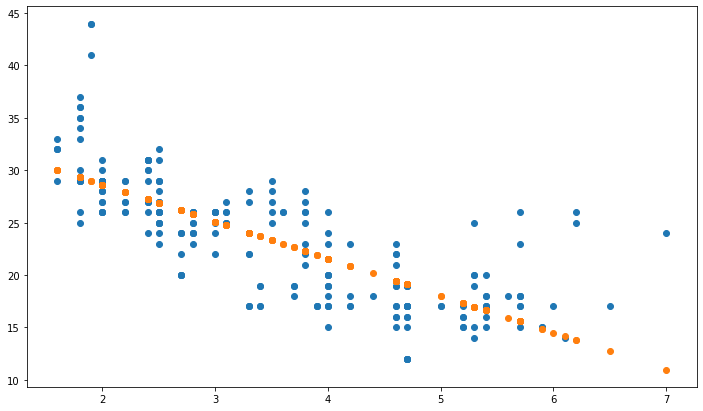

In [61]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')

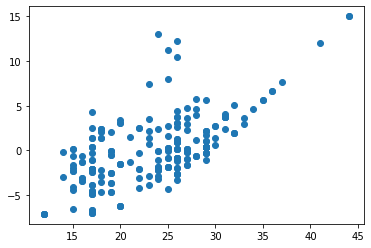

In [62]:
plt.scatter(mpg.hwy, actual - predicted)

(array([15., 12., 18., 44., 48., 33., 29., 17.,  6.,  3.,  2.,  1.,  2.,
         2.,  2.]),
 array([-7.10388366, -5.62959357, -4.15530348, -2.68101339, -1.2067233 ,
         0.26756678,  1.74185687,  3.21614696,  4.69043705,  6.16472714,
         7.63901723,  9.11330732, 10.58759741, 12.0618875 , 13.53617759,
        15.01046768]),
 <BarContainer object of 15 artists>)

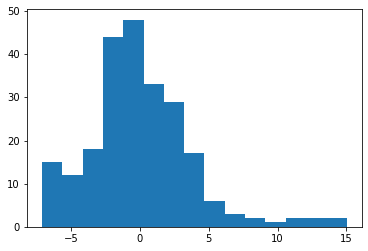

In [63]:
plt.hist(actual - predicted, bins=15)